# Update/change an existing target

Sometime, you don't want to use the pre-defined targets as given. You may want to change the model function parameters (the `kwargs`) or even the function (the `func`) used to draw the target's parameters. 

You can do that while calling `draw()`, `from_draw()` or simply using `update_model()`. 

Let's see the differences.

***
## Changing model entry's parameters

This is the simplest and the most commun usage. 

You want to change the model's parameters. You can do that using `**kwargs` of `draw()` (`from_draw()`) method, with the format:
```python
{entry_name: dict}
```


For instance, let's change the **alpha** and **beta** parameters of the SNeIa model ; these are parameters of the **magabs** function (see, `skysurvey.target.snia.SNeIaMagnitude.tripp1998`):

In [1]:
import skysurvey

snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 magabs={"alpha":-0.15, "beta":3.8} # kwargs here
                                )
snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec,template
0,0.1795,-1.505,-0.018,56178.820312,-19.260296,20.505405,0.000100,286.053436,-73.845627,salt2
1,0.1705,1.635,0.365,56180.847656,-18.336136,21.306215,0.000048,296.849365,19.167883,salt2
2,0.1295,0.900,0.339,56120.816406,-18.100573,20.889549,0.000070,171.111328,-14.783126,salt2
3,0.1545,0.870,0.040,56050.171875,-19.254091,20.153208,0.000138,33.918930,12.749045,salt2
4,0.1955,1.235,-0.042,56031.105469,-19.489254,20.482216,0.000102,230.998703,-66.772179,salt2
...,...,...,...,...,...,...,...,...,...,...
995,0.1905,-0.530,0.029,56005.777344,-19.155895,20.753002,0.000079,316.442749,4.067553,salt2
996,0.1575,1.430,0.017,56026.976562,-19.576254,19.876793,0.000178,355.439331,13.675174,salt2
997,0.1365,-0.745,-0.041,56157.359375,-19.502314,19.611729,0.000227,188.437012,48.898655,salt2
998,0.0895,0.570,-0.052,56148.414062,-19.566803,18.564322,0.000596,91.512428,-19.861418,salt2


**Using `kwargs` does not update the actual instance's model, but simply what is used to draw the data**

Consequently, so the ``model`` itself is not changed.

In [2]:
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x29d5b51f0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x29d5b5160>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x107587640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x29d5b5280>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x29c16c160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

### how to permanently change instance's model parameters ?

To permanently change the model of the instance, you need to use ``self.update_model_parameter()``

In [3]:
snia.update_model_parameter(magabs={"alpha":-0.15, "beta":3.8} )
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x29d5b51f0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x29d5b5160>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x107587640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x29d5b5280>,
            'kwargs': {'x1': '@x1',
                       'c': '@c',
                       'mabs': -19.3,
                       'sigmaint': 0.1,
                       'alpha': -0.15,
                       'beta': 3.8}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x29c16c160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

***
## Changing model entry's (`func` and `kwargs`)

You can also change the way a parameter is drawn, not just it's function parameters.

To do so, you need to update `func` and provide its new `kwargs` (if any). This means, updating the `model` for the entry.

To do that, you can use:
- the **model** option in `draw()`: this will update the model used to draw but will not affect the actual instance's model
- the **model** option in `from_draw()`: this changes the model while creating the instance, it is thus permanent 
- the `update_model()` method: this is permanent (it is what `from_draw()` uses).

The format is that of a model (see [modelDAG](https://modeldag.readthedocs.io/en/latest/)):
```python
{entry_name: {"func": a_function, ["kwargs": dict, "as": string_or_list]}}
```


For instance, say we want to change how the **c** parameter is drawn, we want to use a uniform distribution between -1 and +3: 

In [4]:
import numpy as np
new_model_for_c = {"c": {"func": np.random.uniform, "kwargs": {"low":-1, "high":+3}}}

In [5]:
snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 model=new_model_for_c
                                )


<Axes: ylabel='Frequency'>

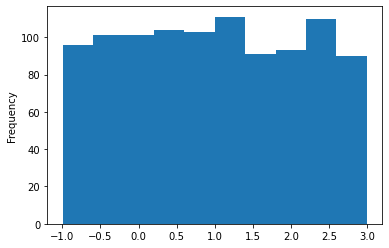

In [6]:
snia.data["c"].plot.hist()

**here, the change is permanent, as you changed the model used to load the instance**

In [7]:
snia.model # check-out the c-entry

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x29d5b51f0>},
 'c': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x107587640>,
       'kwargs': {'low': -1, 'high': 3}},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x107587640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x29d5b5280>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x29c16c160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

to change the model only for a `draw()` call

In [8]:
snia = skysurvey.SNeIa()
data_updated = snia.draw(size=1_000, model=new_model_for_c)
data_not_updated = snia.draw(size=1_000)

<Axes: ylabel='Frequency'>

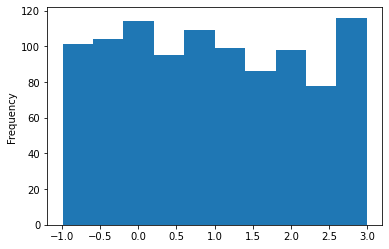

In [9]:
data_updated["c"].plot.hist()

<Axes: ylabel='Frequency'>

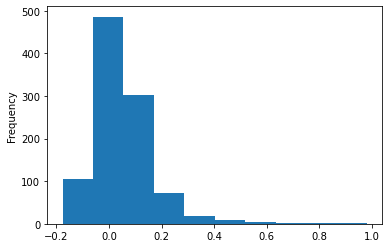

In [10]:
data_not_updated["c"].plot.hist()

### use `update_model()`

you can directly change (permanently) the model using update_model

In [11]:
flat_model = {"c": {"func": np.random.uniform, "kwargs": {"low":-0.1, "high":+1}},
              "x1": {"func": np.random.uniform, "kwargs": {"low":-3, "high":+3}}
             }

snia = skysurvey.SNeIa()
snia.update_model(**flat_model)
data = snia.draw(1_000)

In [12]:
data

,z,x1,c,t0,magabs,magobs,x0,ra,dec
0,0.0495,-1.244012,0.844753,56012.217644,-16.488445,20.296469,0.000121,45.464550,56.335689
1,0.1115,-2.111851,0.610793,56011.403811,-17.116474,21.523528,0.000039,300.796931,-15.855493
2,0.1415,-1.279111,0.072549,56011.514896,-18.943110,20.255857,0.000125,160.816364,-16.611870
3,0.1785,-1.049004,0.374757,56003.906713,-17.896183,21.856100,0.000029,239.598357,1.597908
4,0.1165,-1.605290,-0.039393,56023.185117,-19.341457,19.400850,0.000276,228.447482,12.711492
...,...,...,...,...,...,...,...,...,...
995,0.1635,-0.256755,0.267285,56067.817212,-18.433233,21.108923,0.000057,2.183121,13.071712
996,0.1865,-2.371955,0.835858,56057.884865,-16.350786,23.506948,0.000006,134.835573,38.445635
997,0.1605,-0.435017,0.810463,56133.839023,-16.684082,22.813906,0.000012,113.017990,7.290792
998,0.1745,0.408315,0.661788,56155.063177,-17.266170,22.431732,0.000017,267.332056,-72.982666


### shall I update a model or create a new one ?

`model` option can **affect any entry**, you can even **add entry**, but any new entry will be appended at the end of the dist model. **So to create an internal dependency, you will need to create a new model from scratch.**


***
## How to insert a new entry to create an internal dependency


Say you want to randomly draw **beta** from a normal distribution and use this drawn parameter as input of **magabs**


**using update_model() will not work** because beta will be appended to the end of the `model` dict, while you would need it *before* magabs.

In [13]:
random_beta_model = {"beta": {"func": np.random.normal, "kwargs": {"loc":3.5, "scale":0.1}},
                     "magabs": {"func": skysurvey.target.snia.SNeIaMagnitude.tripp1998,
                                "kwargs": {"x1":"@x1", "c":"@c", "beta":"@beta"}}
                     }

In [14]:
snia = skysurvey.SNeIa()

In [15]:
_ = snia.draw(1_000, model=random_beta_model)

KeyError: 'beta'

**To do that, change the whole model, using `sn.set_model()`**

For example, this two steps update works

1. update the model

In [20]:
from pprint import pprint
new_model = {**snia.get_model(), **random_beta_model}
new_model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function skysurvey.target.snia.SNeIaStretch.nicolas2021(xx='-4:4:0.005', mu1=0.33, sigma1=0.64, mu2=-1.5, sigma2=0.58, a=0.45, fprompt=0.5, redshift=None)>},
 'c': {'func': <function skysurvey.target.snia.SNeIaColor.intrinsic_and_dust(xx='-0.3:1:0.001', cint=-0.05, sigmaint=0.05, tau=0.1)>},
 't0': {'func': <function RandomState.uniform>,
  'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function skysurvey.target.snia.SNeIaMagnitude.tripp1998(x1, c, mabs=-19.3, sigmaint=0.1, alpha=-0.14, beta=3.15)>,
  'kwargs': {'x1': '@x1', 'c': '@c', 'beta': '@beta'}},
 'magobs': {'func': 'magabs_to_magobs',
  'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
  'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function skysurvey.tools.utils.random_radec(size=None, skyarea=None, ra_range=[0, 360], dec_range=[-90, 90])>,
  'kwargs': {},
  'as': ['ra', 'dec']},
 '

**The problem here that `beta` is after `magabs`**

so 

2. let's change the entry order

In [25]:
new_order_entry = ["redshift", "t0","x1","c", "beta", "magabs", "magobs", "radec"]
good_order_model = {k:new_model[k] for k in new_order_entry}
good_order_model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 't0': {'func': <function RandomState.uniform>,
  'kwargs': {'low': 56000, 'high': 56200}},
 'x1': {'func': <function skysurvey.target.snia.SNeIaStretch.nicolas2021(xx='-4:4:0.005', mu1=0.33, sigma1=0.64, mu2=-1.5, sigma2=0.58, a=0.45, fprompt=0.5, redshift=None)>},
 'c': {'func': <function skysurvey.target.snia.SNeIaColor.intrinsic_and_dust(xx='-0.3:1:0.001', cint=-0.05, sigmaint=0.05, tau=0.1)>},
 'beta': {'func': <function RandomState.normal>,
  'kwargs': {'loc': 3.5, 'scale': 0.1}},
 'magabs': {'func': <function skysurvey.target.snia.SNeIaMagnitude.tripp1998(x1, c, mabs=-19.3, sigmaint=0.1, alpha=-0.14, beta=3.15)>,
  'kwargs': {'x1': '@x1', 'c': '@c', 'beta': '@beta'}},
 'magobs': {'func': 'magabs_to_magobs',
  'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'radec': {'func': <function skysurvey.tools.utils.random_radec(size=None, skyarea=None, ra_range=[0, 360], dec_range=[-90, 90])>,
  'kwargs': {},
  'as': ['ra', 'dec']}}

and let's change the model as such

In [26]:
snia.set_model(good_order_model) # this overwrite the whole model, use update_model to only change one entry

In [28]:
data = snia.draw(1_000)
data

,z,t0,x1,c,beta,magabs,magobs,ra,dec
0,0.1985,56140.660693,-1.785,0.082,3.571039,-18.731823,21.276484,254.556142,63.549139
1,0.1515,56105.821699,0.990,0.018,3.339867,-19.272846,20.087870,179.827768,-52.060241
2,0.1935,56098.556128,1.595,-0.114,3.380784,-19.884403,20.062218,94.350955,56.477604
3,0.0945,56040.359785,0.490,0.037,3.351074,-19.271783,18.984658,21.044348,29.985743
4,0.1175,56049.750106,0.985,0.037,3.522649,-19.266887,19.495384,231.466217,51.874937
...,...,...,...,...,...,...,...,...,...
995,0.0975,56123.756739,0.260,0.003,3.371597,-19.408330,18.920315,141.169291,-30.503641
996,0.1965,56166.634653,0.245,0.081,3.611956,-19.051809,20.931998,135.009314,31.284049
997,0.1105,56142.081683,-0.020,0.174,3.566042,-18.754513,19.864511,53.913440,-37.079336
998,0.1385,56089.443525,0.615,-0.040,3.444480,-19.578625,19.569732,251.727729,-39.007539


The best may actually be here to create a new Transient.